In [4]:
pwd

'/home/jj/Documents/Self-Driving-Car/CarND-LaneLines-P1/Lesson1_Practice'

image shape:  (540, 960, 3)
image shape[0]:  540
image shape[1]:  960
shape of masked edges:  (540, 960)
mask shape:  (540, 960)
edges shape:  (540, 960)
masked edges shape:  [[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


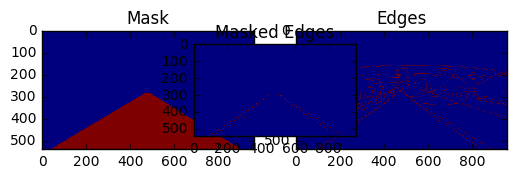

Where is color in color edges:  (array([158, 158, 158, ..., 539, 539, 539]), array([467, 468, 469, ..., 113, 838, 881]))
color edges shape:  [[255 255 255]
 [255 255 255]
 [255 255 255]
 ..., 
 [255 255 255]
 [255 255 255]
 [255 255 255]]


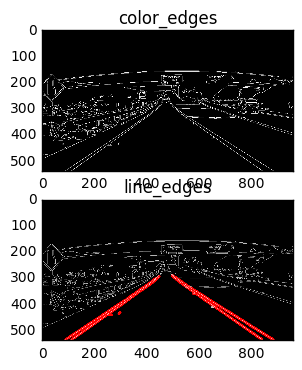

In [60]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline
# Read in and grayscale the image
# Note: in the previous example we were reading a .jpg 
# Here we read a .png and convert to 0,255 bytescale
image = (mpimg.imread('exit-ramp.png')*255).astype('uint8')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255

# This time we are defining a four sided polygon to mask
imshape = image.shape
print('image shape: ', imshape)
print('image shape[0]: ', imshape[0])
print('image shape[1]: ', imshape[1])
vertices = np.array([[(40,imshape[0]),(465, 285), (imshape[1]-475, 285), (imshape[1] -65,imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

print('shape of masked edges: ', masked_edges.shape)

fig = plt.figure()
a = fig.add_subplot(1,2,1)
a.set_title('Mask')
edge1plot = plt.imshow(mask)
print('mask shape: ', mask.shape)

a = fig.add_subplot(1, 2, 2)
edge1plot = plt.imshow(edges)
a.set_title('Edges')
print('edges shape: ', edges.shape)

a = fig.add_subplot(3,1,2)
a.set_title('Masked Edges')
edge1plot = plt.imshow(masked_edges)
print('masked edges shape: ', masked_edges)

plt.show()

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 5     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 5 #minimum number of pixels making up a line
max_line_gap = 1    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)


# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

print('Where is color in color edges: ', np.where(color_edges[:,:,1] > 0))
print('color edges shape: ', color_edges[np.where(color_edges[:,:,1] > 0)])

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 

fig = plt.figure()
b = fig.add_subplot(2,1,1)
edgeplot = plt.imshow(color_edges)
b.set_title('color_edges')

b = fig.add_subplot(2,1,2)
b.set_title('line_edges')
edgeplot = plt.imshow(lines_edges)
plt.show()



# plt.imshow(lines_edges)

